# Weighted Moving Average (WMA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-08-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-01,199.130005,201.759995,197.309998,201.500000,199.243088,67935700
2018-08-02,200.580002,208.380005,200.350006,207.389999,205.067123,62404000
2018-08-03,207.029999,208.740005,205.479996,207.990005,205.660416,33447400
2018-08-06,208.000000,209.250000,207.070007,209.070007,206.728317,25425400
2018-08-07,209.320007,209.500000,206.759995,207.110001,204.790268,25587400


https://www.investopedia.com/ask/answers/071414/whats-difference-between-moving-average-and-weighted-moving-average.asp

https://www.thebalance.com/simple-exponential-and-weighted-moving-averages-1031196

In [3]:
def WMA(data, n):

    ws = np.zeros(data.shape[0])
    t_sum = sum(range(1, n+1))
   
    for i in range(n-1, data.shape[0]):
        ws[i] = sum(data[i-n+1 : i+1] * np.linspace(1, n, n))/ t_sum
        
    return ws

In [4]:
df['WMA'] = WMA(df['Adj Close'], 5)
df.head()

,Open,High,Low,Close,Adj Close,Volume,WMA
Date,,,,,,,
2018-08-01,199.130005,201.759995,197.309998,201.500000,199.243088,67935700,0.000000
2018-08-02,200.580002,208.380005,200.350006,207.389999,205.067123,62404000,0.000000
2018-08-03,207.029999,208.740005,205.479996,207.990005,205.660416,33447400,0.000000
2018-08-06,208.000000,209.250000,207.070007,209.070007,206.728317,25425400,0.000000
2018-08-07,209.320007,209.500000,206.759995,207.110001,204.790268,25587400,205.148213


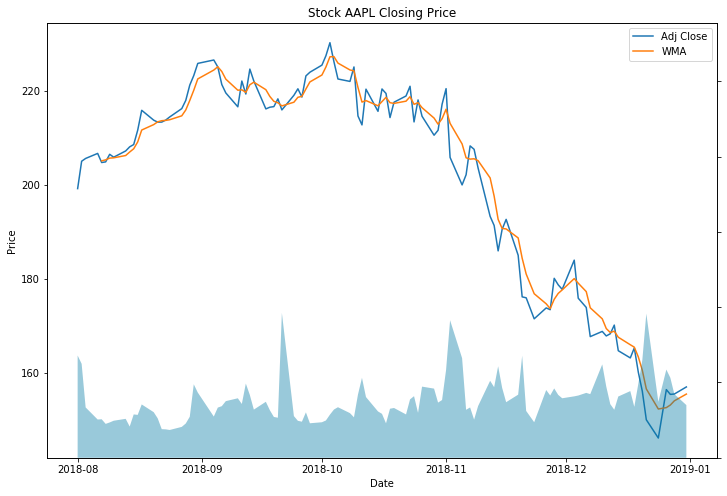

In [5]:
# Line Chart
fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot(111)
ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index[4:], df['WMA'][4:])
ax1v = ax1.twinx()
ax1v.fill_between(df.index[0:],0, df.Volume[0:], facecolor='#0079a3', alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')
ax1.legend(loc='best')

# Candlestick with WMA

In [6]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'].astype(dt.date))
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,WMA,VolumePositive
0,736907.0,199.130005,201.759995,197.309998,201.500000,199.243088,67935700,0.000000,True
1,736908.0,200.580002,208.380005,200.350006,207.389999,205.067123,62404000,0.000000,True
2,736909.0,207.029999,208.740005,205.479996,207.990005,205.660416,33447400,0.000000,False
3,736912.0,208.000000,209.250000,207.070007,209.070007,206.728317,25425400,0.000000,False
4,736913.0,209.320007,209.500000,206.759995,207.110001,204.790268,25587400,205.148213,False


In [7]:
dfc = dfc.iloc[4:]
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,WMA,VolumePositive
4,736913.0,209.320007,209.500000,206.759995,207.110001,204.790268,25587400,205.148213,False
5,736914.0,206.050003,207.809998,204.520004,207.250000,204.928696,22525500,205.358497,False
6,736915.0,207.279999,209.779999,207.199997,208.880005,206.540436,23469200,205.726988,False
7,736916.0,207.360001,209.100006,206.669998,207.529999,205.925232,24611200,205.792190,False
8,736919.0,207.699997,210.949997,207.699997,208.869995,207.254883,25869100,206.282954,False


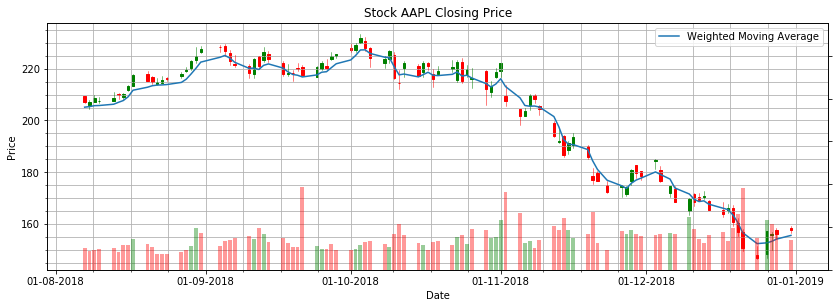

In [8]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(dfc.Date, dfc['WMA'], label='Weighted Moving Average')
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*dfc.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')
ax1.legend(loc='best')